In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

def myU(ind, w):
    return qml.PhaseShift(2 * np.pi * ind / 5, wires=w)

In [2]:
dev = qml.device("default.qubit", wires=5, shots=2048)

@qml.qnode(dev)
def circuit_QPE():
    qml.PauliX(wires=0)
    for w in range(1,5):
        qml.Hadamard(wires=w)
    for w in range(1,5):
        qml.ControlledQubitUnitary(myU(2**(w-1),0), control_wires=5-w, wires=0)
    qml.adjoint(qml.QFT)(wires=range(1,5))
    return qml.counts(wires=range(1,5))


/Users/elec1020/miniforge3/envs/elec1020/lib/python3.10/site-packages/pennylane/ops/op_math/controlled_ops.py:163: UserWarning: base operator already has wires; values specified through wires kwarg will be ignored.
  warnings.warn(


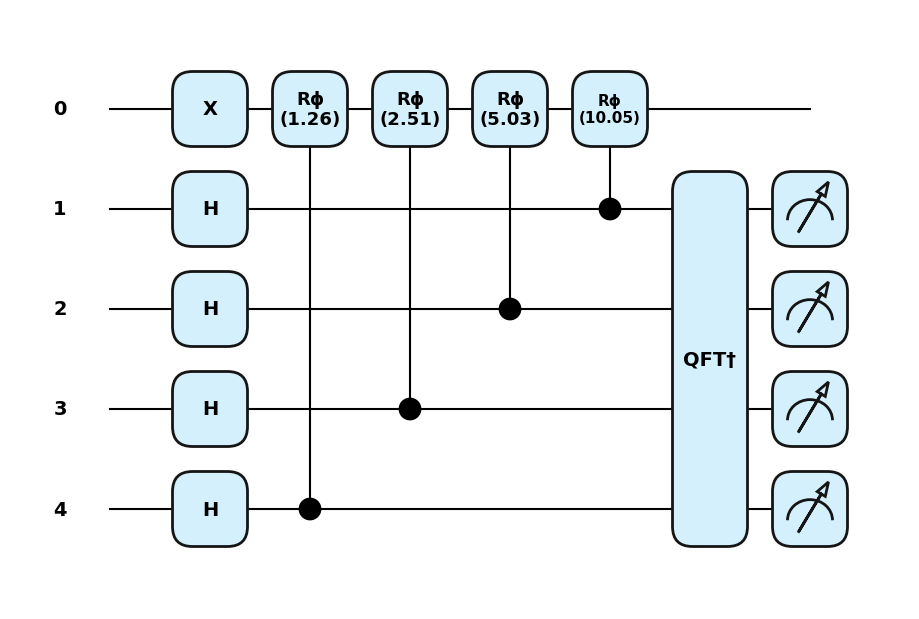

In [3]:
qml.draw_mpl(circuit_QPE, decimals = 2, style = "pennylane")()
plt.show()

In [4]:
results = circuit_QPE()
results


/Users/elec1020/miniforge3/envs/elec1020/lib/python3.10/site-packages/pennylane/ops/op_math/controlled_ops.py:163: UserWarning: base operator already has wires; values specified through wires kwarg will be ignored.
  warnings.warn(


{'0000': 3,
 '0001': 23,
 '0010': 65,
 '0011': 1782,
 '0100': 113,
 '0101': 28,
 '0110': 7,
 '0111': 3,
 '1000': 3,
 '1001': 2,
 '1010': 3,
 '1011': 3,
 '1100': 3,
 '1101': 1,
 '1110': 5,
 '1111': 4}